3d graphs

pairplot
3dscatter
bubbleplot
grouped bar plot


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# store wine type as an attribute
red_wine['wine_type'] = 'red'   
white_wine['wine_type'] = 'white'

# bucket wine quality scores into qualitative quality labels
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                                  if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

# merge red and white wine datasets
wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


C:\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

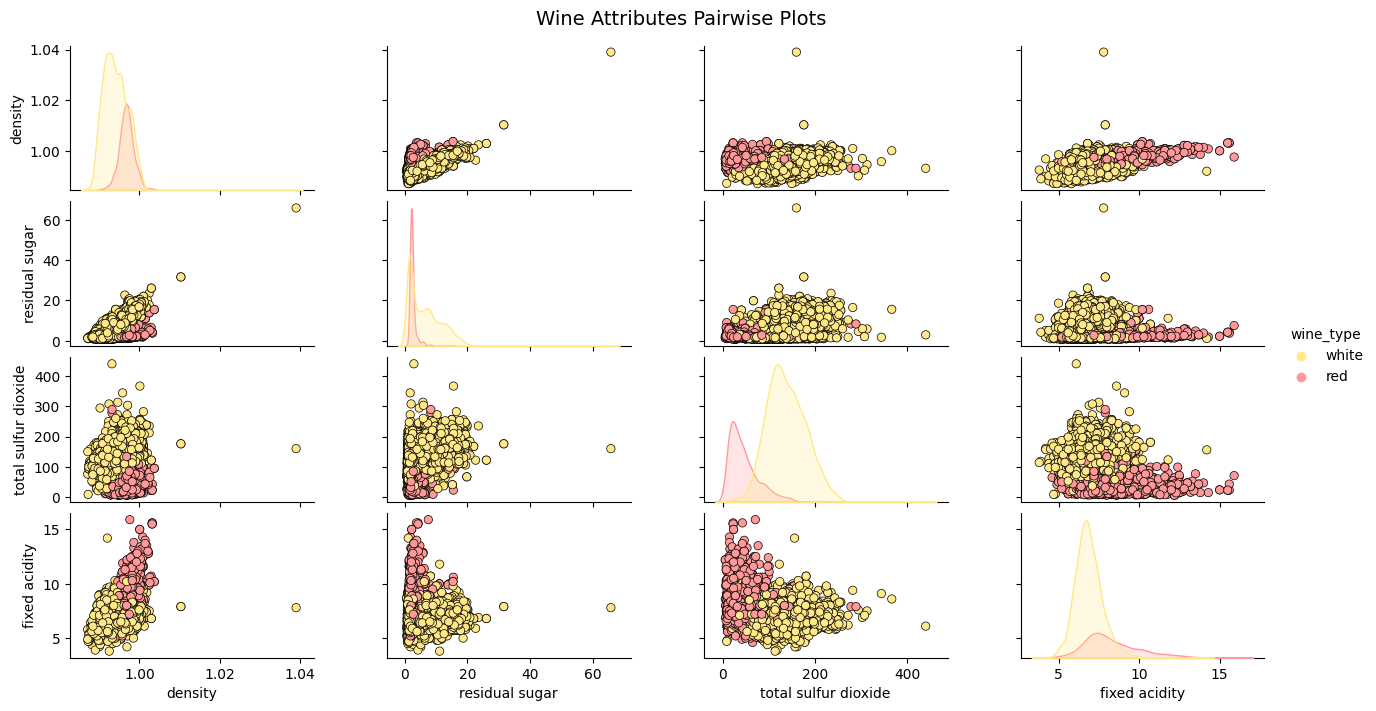

In [17]:
# Scatter Plot with Hue for visualizing data in 3-D
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'wine_type']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

Text(0.5, 0, 'Alcohol')

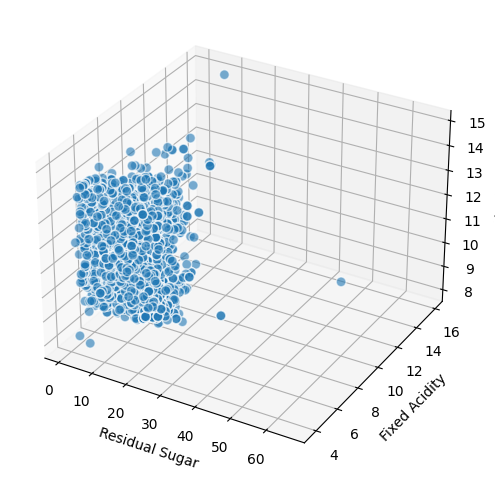

In [18]:

# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = wines['residual sugar']
ys = wines['fixed acidity']
zs = wines['alcohol']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('Fixed Acidity')
ax.set_zlabel('Alcohol')

Text(0.5, 1.05, 'Wine Alcohol Content - Fixed Acidity - Residual Sugar')

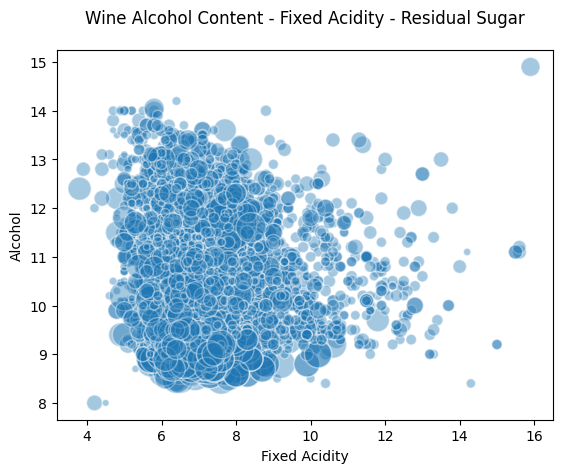

In [19]:
# Visualizing 3-D numeric data with a bubble chart
# length, breadth and size
plt.scatter(wines['fixed acidity'], wines['alcohol'], s=wines['residual sugar']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('Fixed Acidity')
plt.ylabel('Alcohol')
plt.title('Wine Alcohol Content - Fixed Acidity - Residual Sugar',y=1.05)

C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Python311\Lib\site-pa

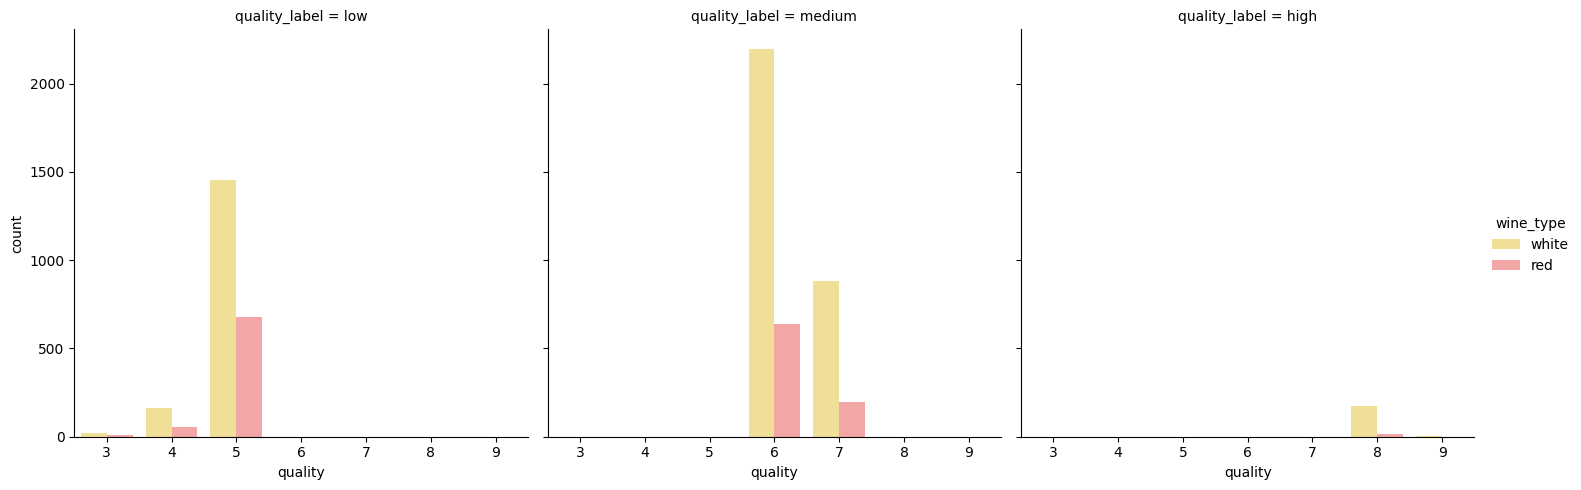

In [20]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.catplot(x="quality", hue="wine_type", col="quality_label", 
                    data=wines, kind="count",
                    palette={"red": "#FF9999", "white": "#FFE888"})

In [35]:
ax = sns.kdeplot(white_wine['sulphates'], white_wine['alcohol'], color='blue', shade=True)
ax = sns.kdeplot(red_wine['sulphates'], red_wine['alcohol'], cmap="Reds", shade=True, shade_lowest=False)

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given